# AI ML Based News Classifier

IMPORTING THE LIBRARY FILES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re

DATA LOADING

In [3]:
def load_data():
    data = pd.read_csv('all-data.csv', sep=',', encoding='latin-1',names = ["category","comment"])
    return data


In [4]:
tweet_df = load_data()
df=load_data()
tweet_df.head()


,category,comment
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,neutral,At the request of Finnish media company Alma M...
4,neutral,"In Sweden , Gallerix accumulated SEK denominat..."


In [5]:

print(tweet_df.shape)
print("COLUMN NAMES" , tweet_df.columns)

print(tweet_df.info())

(12914, 2)
COLUMN NAMES Index(['category', 'comment'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12914 entries, 0 to 12913
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  12914 non-null  object
 1   comment   12914 non-null  object
dtypes: object(2)
memory usage: 201.9+ KB
None


VISUALIZATION OF CATEGORIES OF TEXT DATA - EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='category', ylabel='count'>

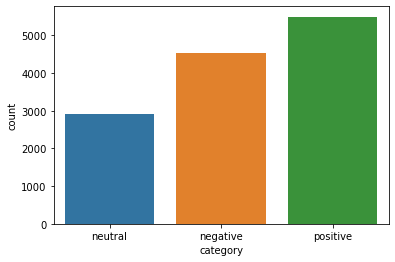

In [6]:
#TEXT VISUALIZATION 
sns.countplot(x="category",data=tweet_df)

# TEXT PRE-PROCESSING

1. REMOVING PUNCTUATIONS

In [7]:
#remove punctuations
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tweet_df['comment'] = tweet_df['comment'].apply(lambda x: remove_punct(x))
tweet_df.head(10)

,category,comment
0,neutral,According to Gran the company has no plans to...
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,neutral,At the request of Finnish media company Alma M...
4,neutral,In Sweden Gallerix accumulated SEK denominate...
5,neutral,The company supports its global customers in d...
6,neutral,When this investment is in place Atria plans ...
7,neutral,The new agreement is a continuation to theagr...
8,neutral,In June it sold a percent stake to Nordstjern...
9,neutral,STOCK EXCHANGE ANNOUNCEMENT July BASWARE...


2. STOPWORDS REMOVAL

In [8]:
#stopwords removal
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vaibhav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

tweet_df["text_wo_stop"] = tweet_df["comment"].apply(lambda text: remove_stopwords(text))
tweet_df.head()



,category,comment,text_wo_stop
0,neutral,According to Gran the company has no plans to...,According Gran company plans move production R...
1,neutral,Technopolis plans to develop in stages an area...,Technopolis plans develop stages area less squ...
2,negative,The international electronic industry company ...,The international electronic industry company ...
3,neutral,At the request of Finnish media company Alma M...,At request Finnish media company Alma Media ne...
4,neutral,In Sweden Gallerix accumulated SEK denominate...,In Sweden Gallerix accumulated SEK denominated...


In [10]:
#remove 
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

tweet_df.head(20)

,category,comment,text_wo_stop
0,neutral,According to Gran the company has no plans to move all production to Russia although that is w...,According Gran company plans move production Russia although company growing
1,neutral,Technopolis plans to develop in stages an area of no less than square meters in order to host c...,Technopolis plans develop stages area less square meters order host companies working computer t...
2,negative,The international electronic industry company Elcoteq has laid off tens of employees from its Ta...,The international electronic industry company Elcoteq laid tens employees Tallinn facility contr...
3,neutral,At the request of Finnish media company Alma Media s newspapers research manager Jari Kaivooja ...,At request Finnish media company Alma Media newspapers research manager Jari Kaivooja Finland Fu...
4,neutral,In Sweden Gallerix accumulated SEK denominated sales were down and EUR denominated sales were...,In Sweden Gallerix accumulated SEK denominated sales EUR denominated sales
5,neutral,The company supports its global customers in developing new technologies and offers a fast route...,The company supports global customers developing new technologies offers fast route product deve...
6,neutral,When this investment is in place Atria plans to expand into the Moscow market,When investment place Atria plans expand Moscow market
7,neutral,The new agreement is a continuation to theagreement signed earlier this year with the Lemminkai...,The new agreement continuation theagreement signed earlier year Lemminkainen Group whereby Cramo...
8,neutral,In June it sold a percent stake to Nordstjernan and the investment group has now taken up the ...,In June sold percent stake Nordstjernan investment group taken option acquire EQT remaining shares
9,neutral,STOCK EXCHANGE ANNOUNCEMENT July BASWARE SHARE SUBSCRIPTIONS WITH WARRANTS AND INCREASE IN...,STOCK EXCHANGE ANNOUNCEMENT July BASWARE SHARE SUBSCRIPTIONS WITH WARRANTS AND INCREASE IN SHARE...


3. STEMMING AND LEMMATIZATION OF TEXT DATA


In [10]:
#stemming and lemmatization
# from nltk.stem.porter import PorterStemmer
# stemmer = PorterStemmer()
# def stem_words(text):
#     return " ".join([stemmer.stem(word) for word in text.split()])
# tweet_df["text_stemmed"] = tweet_df["text_wo_stop"].apply(lambda text: stem_words(text))
# tweet_df.head()



,category,comment,text_wo_stop,text_stemmed
0,neutral,According to Gran the company has no plans to move all production to Russia although that is w...,According Gran company plans move production Russia although company growing,accord gran compani plan move product russia although compani grow
1,neutral,Technopolis plans to develop in stages an area of no less than square meters in order to host c...,Technopolis plans develop stages area less square meters order host companies working computer t...,technopoli plan develop stage area less squar meter order host compani work comput technolog tel...
2,negative,The international electronic industry company Elcoteq has laid off tens of employees from its Ta...,The international electronic industry company Elcoteq laid tens employees Tallinn facility contr...,the intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier lay...
3,neutral,At the request of Finnish media company Alma Media s newspapers research manager Jari Kaivooja ...,At request Finnish media company Alma Media newspapers research manager Jari Kaivooja Finland Fu...,at request finnish media compani alma media newspap research manag jari kaivooja finland futur r...
4,neutral,In Sweden Gallerix accumulated SEK denominated sales were down and EUR denominated sales were...,In Sweden Gallerix accumulated SEK denominated sales EUR denominated sales,in sweden gallerix accumul sek denomin sale eur denomin sale


4. COUNT VECTORIZATION

In [11]:
# #remove frequent words - countvectorization
from collections import Counter
cnt = Counter()
for text in tweet_df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(20)

[('EUR', 2626),
 ('The', 1944),
 ('mn', 1464),
 ('company', 1211),
 ('profit', 954),
 ('AAP', 920),
 ('Finnish', 881),
 ('said', 865),
 ('sales', 847),
 ('million', 805),
 ('net', 733),
 ('user', 653),
 ('year', 617),
 ('period', 606),
 ('today', 555),
 ('quarter', 538),
 ('mln', 516),
 ('Finland', 503),
 ('I', 490),
 ('In', 472)]

5. REMOVAL OF THE MOST FREQUENT WORDS

In [12]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

tweet_df["text__stop_freq"] = tweet_df["text_wo_stop"].apply(lambda text: remove_freqwords(text))
tweet_df.head()

,category,comment,text_wo_stop,text__stop_freq
0,neutral,According to Gran the company has no plans to move all production to Russia although that is w...,According Gran company plans move production Russia although company growing,According Gran plans move production Russia although growing
1,neutral,Technopolis plans to develop in stages an area of no less than square meters in order to host c...,Technopolis plans develop stages area less square meters order host companies working computer t...,Technopolis plans develop stages area less square meters order host companies working computer t...
2,negative,The international electronic industry company Elcoteq has laid off tens of employees from its Ta...,The international electronic industry company Elcoteq laid tens employees Tallinn facility contr...,international electronic industry Elcoteq laid tens employees Tallinn facility contrary earlier ...
3,neutral,At the request of Finnish media company Alma Media s newspapers research manager Jari Kaivooja ...,At request Finnish media company Alma Media newspapers research manager Jari Kaivooja Finland Fu...,At request media Alma Media newspapers research manager Jari Kaivooja Finland Futures Research C...
4,neutral,In Sweden Gallerix accumulated SEK denominated sales were down and EUR denominated sales were...,In Sweden Gallerix accumulated SEK denominated sales EUR denominated sales,In Sweden Gallerix accumulated SEK denominated denominated


In [13]:
# import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

tweet_df["text_lemmatized"] = tweet_df["text_wo_stop"].apply(lambda text: lemmatize_words(text))
tweet_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vaibhav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Vaibhav\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,category,comment,text_wo_stop,text__stop_freq,text_lemmatized
0,neutral,According to Gran the company has no plans to move all production to Russia although that is w...,According Gran company plans move production Russia although company growing,According Gran plans move production Russia although growing,According Gran company plan move production Russia although company grow
1,neutral,Technopolis plans to develop in stages an area of no less than square meters in order to host c...,Technopolis plans develop stages area less square meters order host companies working computer t...,Technopolis plans develop stages area less square meters order host companies working computer t...,Technopolis plan develop stage area less square meter order host company work computer technolog...
2,negative,The international electronic industry company Elcoteq has laid off tens of employees from its Ta...,The international electronic industry company Elcoteq laid tens employees Tallinn facility contr...,international electronic industry Elcoteq laid tens employees Tallinn facility contrary earlier ...,The international electronic industry company Elcoteq laid ten employee Tallinn facility contrar...
3,neutral,At the request of Finnish media company Alma Media s newspapers research manager Jari Kaivooja ...,At request Finnish media company Alma Media newspapers research manager Jari Kaivooja Finland Fu...,At request media Alma Media newspapers research manager Jari Kaivooja Finland Futures Research C...,At request Finnish medium company Alma Media newspaper research manager Jari Kaivooja Finland Fu...
4,neutral,In Sweden Gallerix accumulated SEK denominated sales were down and EUR denominated sales were...,In Sweden Gallerix accumulated SEK denominated sales EUR denominated sales,In Sweden Gallerix accumulated SEK denominated denominated,In Sweden Gallerix accumulate SEK denominate sale EUR denominate sale


6. DROPPING THE UN-USED COLUMNS

In [14]:
#drop the columns
tweet_df=tweet_df.drop(["text_wo_stop","text__stop_freq"],axis=1)

7. LABEL ENCODING OF THE CATEGORICAL VARIABLES

In [15]:
#label encoding
from sklearn.preprocessing import LabelEncoder
tweet_df['encoded_category'] = LabelEncoder().fit_transform(tweet_df['category'])
tweet_df[["category", "encoded_category"]]

,category,encoded_category
0,neutral,1
1,neutral,1
2,negative,0
3,neutral,1
4,neutral,1
...,...,...
12909,negative,0
12910,negative,0
12911,positive,2
12912,positive,2


In [16]:
def clean_review(text):
    clean_text = []
    for w in word_tokenize(text):
        if w.lower() not in stop:
            pos = pos_tag([w])
            new_w = lemmatizer.lemmatize(w, pos=get_simple_pos(pos[0][1]))
            clean_text.append(new_w)
    return clean_text

def join_text(text):
    return " ".join(text)

In [17]:
tweet_df=tweet_df.drop(["category","comment"],axis=1)

PREVIEW OF THE CLEAN AND PRE-PROCESSED TEXT

In [18]:
tweet_df.head(10)

,text_lemmatized,encoded_category
0,According Gran company plan move production Russia although company grow,1
1,Technopolis plan develop stage area less square meter order host company work computer technolog...,1
2,The international electronic industry company Elcoteq laid ten employee Tallinn facility contrar...,0
3,At request Finnish medium company Alma Media newspaper research manager Jari Kaivooja Finland Fu...,1
4,In Sweden Gallerix accumulate SEK denominate sale EUR denominate sale,1
5,The company support global customer develop new technology offer fast route product development ...,1
6,When investment place Atria plan expand Moscow market,1
7,The new agreement continuation theagreement sign earlier year Lemminkainen Group whereby Cramo a...,1
8,In June sell percent stake Nordstjernan investment group take option acquire EQT remain share,1
9,STOCK EXCHANGE ANNOUNCEMENT July BASWARE SHARE SUBSCRIPTIONS WITH WARRANTS AND INCREASE IN SHARE...,1


# CLASSIFICATION MODEL BUILDING

SPLITTING OF TRAIN AND TEST DATA

In [19]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

x_train,x_test,y_train,y_test = train_test_split(tweet_df.text_lemmatized,tweet_df.encoded_category,test_size = 0.3 , random_state = 0)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9039,), (3875,), (9039,), (3875,))

1. LINEAR SUPPORT VECTOR MACHINE

In [20]:
import time
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', SVC(kernel="linear"))])

model = pipe.fit(x_train, y_train)
start_time = time.time()
prediction = model.predict(x_test)
linear_svc_prediction_time = time.time() - start_time
print(linear_svc_prediction_time)
print("MODEL - LINEAR SVC")
print("accuracy score: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(classification_report(y_test, prediction))

3.5503454208374023
MODEL - LINEAR SVC
accuracy score: 77.99%
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1383
           1       0.80      0.75      0.77       837
           2       0.76      0.79      0.78      1655

    accuracy                           0.78      3875
   macro avg       0.78      0.78      0.78      3875
weighted avg       0.78      0.78      0.78      3875



2. Polynomial Support Vector Machine

In [21]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', SVC(kernel='poly', degree=2, C=10))])

model2 = pipe.fit(x_train, y_train)
start_time = time.time()
prediction1 = model2.predict(x_test)
poly_svc_time = time.time() - start_time
print(poly_svc_time)
print("MODEL - LINEAR SVC")
print("accuracy score: {}%".format(round(accuracy_score(y_test, prediction1)*100,2)))
print(classification_report(y_test, prediction))

3.9728198051452637
MODEL - LINEAR SVC
accuracy score: 79.77%
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1383
           1       0.80      0.75      0.77       837
           2       0.76      0.79      0.78      1655

    accuracy                           0.78      3875
   macro avg       0.78      0.78      0.78      3875
weighted avg       0.78      0.78      0.78      3875



3. SVC with Radial Basis Function (RBF) Kernel

In [22]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', SVC(kernel='rbf'))])

model3 = pipe.fit(x_train, y_train)
start_time = time.time()
prediction2 = model3.predict(x_test)
rbf_pred_time = time.time() - start_time
print(rbf_pred_time)
print("MODEL - LINEAR SVC")
print("accuracy score: {}%".format(round(accuracy_score(y_test, prediction2)*100,2)))
print(classification_report(y_test, prediction))

4.432380199432373
MODEL - LINEAR SVC
accuracy score: 79.64%
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1383
           1       0.80      0.75      0.77       837
           2       0.76      0.79      0.78      1655

    accuracy                           0.78      3875
   macro avg       0.78      0.78      0.78      3875
weighted avg       0.78      0.78      0.78      3875



#Saving the Trained Model

In [23]:
import pickle
pickle.dump(model2, open('train_model.pkl','wb'))

2. LOGISTIC REGRESSION

In [24]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(x_train, y_train)
start_time = time.time()
prediction = model.predict(x_test)
logistic_time = time.time() - start_time
print(logistic_time)
print("MODEL - LOGISTIC REGRESSION")
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
# print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

0.05817008018493652
MODEL - LOGISTIC REGRESSION
accuracy: 78.12%
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1383
           1       0.79      0.76      0.77       837
           2       0.76      0.80      0.78      1655

    accuracy                           0.78      3875
   macro avg       0.78      0.78      0.78      3875
weighted avg       0.78      0.78      0.78      3875



C:\Users\Vaibhav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
